# exercise sheet 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy

import pandas as pd
from collections import Counter

## task 1.1 a)
1D random walk

In [86]:
possible_steps = 2
p = 1/possible_steps
start = 0
current_pos = copy.deepcopy(start)

1 walker

In [87]:
nb_steps = 10_000
memory = np.zeros(shape=nb_steps)
random_steps = np.random.randint(0, 2, size=(nb_steps))
random_steps[random_steps==0] = -1

for index, step in enumerate(random_steps):
    if step: # if random val < 0.5 we go to the left, else to the right
        current_pos -= 1
    else:
        current_pos += 1    
    memory[index] = current_pos

multiple walkers

In [80]:
nb_steps = 1_000
nb_walkers = 1_000
memory = np.zeros(shape=nb_steps*nb_walkers)

for i in range(nb_walkers):
    random_steps = np.random.randint(0, 2, size=(nb_steps))
    random_steps[random_steps==0] = -1
    
    current_pos = 0

    for index, step in enumerate(random_steps):
        if step: # if random val < 0.5 we go to the left, else to the right
            current_pos -= 1
        else:
            current_pos += 1    
        memory[index + i*nb_steps] = current_pos

<AxesSubplot:>

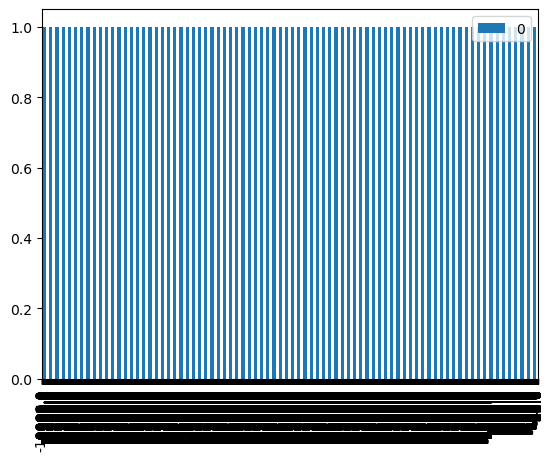

In [88]:
count = Counter(memory)
df = pd.DataFrame.from_dict(count, orient='index')
df.sort_index(inplace=True)
df.plot(kind='bar')

## task 1.1 b)

In [91]:
# N = 10, 100, 1_000
Ns = np.array([10, 100, 1000])
N = Ns[2]

In [111]:
nb_walks = 1_000
possible_steps = 2
p = 1/possible_steps

random_steps = np.random.randint(0, 2, size=(N, nb_walks))
random_steps[random_steps==0] = -1

print(f"{(np.sum(np.sum(random_steps, axis=0) > np.sqrt(N))) / nb_walks:.3f}")
print(f"{(np.sum(np.sum(random_steps, axis=0) > 3*np.sqrt(N))) / nb_walks:.3f}")

0.157
0.000


## task 1.1 c)

In [43]:
possible_steps = 2
p = 1/possible_steps

start_1 = 0
start_2 = 5

In [63]:
nb_steps = 10
random_steps = np.random.randint(0, 2, size=(nb_steps, 2))
random_steps[random_steps==0] = -1

current_pos = np.array([copy.deepcopy(start_1), copy.deepcopy(start_2)])

for col in np.arange(nb_steps):
    #print(f"{current_pos} + {random_steps[col,:]} -> {current_pos + random_steps[col,:]}")
    current_pos += random_steps[col,:]
    if current_pos[0] > current_pos[1]:
        print(f"Agents cross paths in step {col}.")
        break

Agents cross paths in step 18.


In [75]:
nb_steps = 10
nb_simulations = 5_000

nb_crossings = 0

for i in range(nb_simulations):
    random_steps = np.random.randint(0, 2, size=(nb_steps, 2))
    random_steps[random_steps==0] = -1
    current_pos = np.array([copy.deepcopy(start_1), copy.deepcopy(start_2)])

    for col in np.arange(nb_steps):
        current_pos += random_steps[col,:]
        if current_pos[0] > current_pos[1]:
            nb_crossings += 1
            break
            
print(f"{nb_crossings/nb_simulations:.3f}")

0.186
